In [1]:
import numpy as np
import Analysis_source as src
from importlib import reload

# Input files and colors

In [2]:
colors_btime = {'DOP' : (0.0,0.4,1.0),\
                'DON' : (0.0,0.8,1.0),\
                'SER' : (1.0,0.3,0.0),\
                'SEN' : (1.0,0.6,0.0),\
                'PHC' : (0.0,0.2,0.0),\
                'PHN' : (0.0,0.4,0.0),\
                'PHE' : (0.0,0.6,0.0),\
                'PHA' : (0.0,0.8,0.0)}
colors_btime = {key: tuple(min(1.4*(c+(np.mean(col)-c)/2.), 1) for c in col) for key, col in colors_btime.items()}

In [3]:
fnames = {"SER_H" : "BTIMES_WSTD/NP22ser-53_PRO1-5_btimes_WSTD.sfu",
          "PHE_H" : "BTIMES_WSTD/NP22phe-53_PRO1-4_btimes_WSTD.sfu",
          "DOP_H" : "BTIMES_WSTD/NP22dop-53_PRO1-4_btimes_WSTD.sfu"}#,
          #"DON_H" : "BTIMES_WSTD/NP22don-53_PRO1-11_btimes_WSTD.sfu",
          #"SEN_H" : "BTIMES_WSTD/NP22sen-53_PRO1-11_btimes_WSTD.sfu",
          #"PHC_H" : "BTIMES_WSTD/NP22phc-53_PRO1-11_btimes_WSTD.sfu",
          #"PHN_H" : "BTIMES_WSTD/NP22phn-53_PRO1-11_btimes_WSTD.sfu",
          #"PHA_H" : "BTIMES_WSTD/NP22pha-53_PRO1-11_btimes_WSTD.sfu"}

# Import data

In [4]:
btimes = {key[:3] : src.import_events(fname, ignore_ns=0.06)[key] for key, fname in fnames.items()}
keys = btimes.keys()

Importing BTIMES_WSTD/NP22ser-53_PRO1-5_btimes_WSTD.sfu


100%|██████████████████████████████████████████████████████████████████| 13846275/13846275 [00:15<00:00, 883519.98it/s]


Importing BTIMES_WSTD/NP22phe-53_PRO1-4_btimes_WSTD.sfu


100%|██████████████████████████████████████████████████████████████████| 12585827/12585827 [00:23<00:00, 538812.93it/s]


Importing BTIMES_WSTD/NP22dop-53_PRO1-4_btimes_WSTD.sfu


100%|██████████████████████████████████████████████████████████████████| 11441476/11441476 [00:13<00:00, 847651.49it/s]


In [5]:
#btimes = {key : compress_chemical_positions(val, propname=None) for key, val in btimes.items()}

# Plotting

In [6]:
for key, val in btimes.items():
    print(key, val["dt"].min(), val["dt"].max())

SER 0.08 2.28
PHE 0.08 0.9
DOP 0.08 2.82


SER


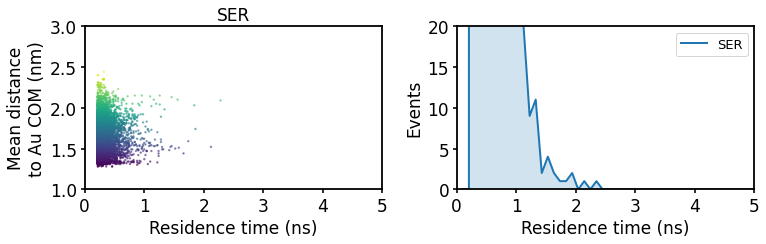

PHE


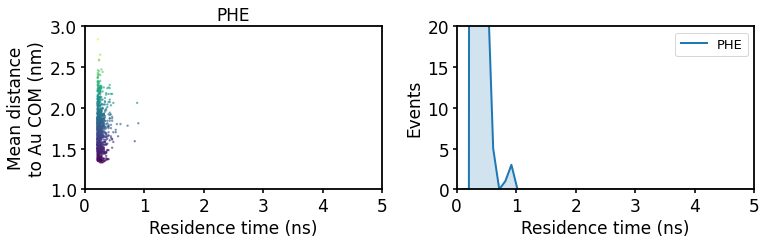

DOP


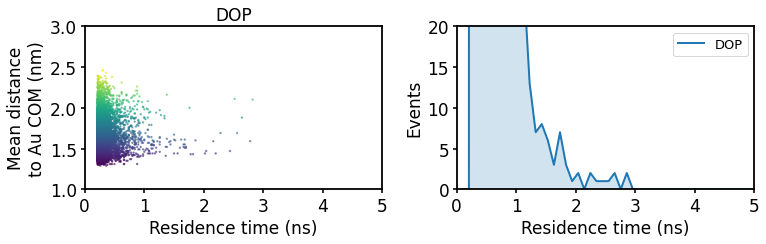

In [7]:
for key in keys:
    src.plot_btime(key, btimes=btimes, ignore_ns=0.2, xlim=(0,5), thresh_ns=5, ylim=(1,3))

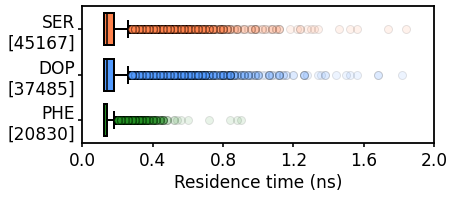

In [20]:
src.prop_boxplot("dt", ignore_ns=0.1, btimes=btimes, colors=colors_btime, ylim=(0,2), ylabel='Residence time (ns)', nticks=6, savefig=True, prefix="Figures/WSTD")
#src.prop_boxplot("dist", ignore_ns=0.2, btimes=btimes, colors=colors_btime, ylim=(1,3.), ylabel='Mean dist to Au COM (nm)', nticks=6)

In [9]:
groups = [['SER', 'DOP'],
         ['SER', 'PHE'],
         ['DOP', 'PHE']]
#for group in groups:
#    src.plot_cluster(group, btimes=btimes, colors=colors_btime, xlim=(0,20), ylim=(1,2.5), ignore_ns=0.5)

SER 0.03125
DOP 0.03125
PHE 0.03125


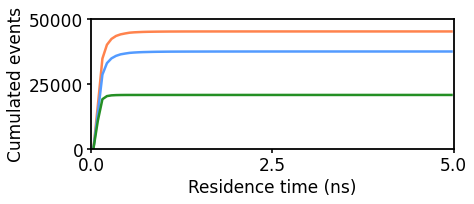

In [22]:
groups = [['SER', 'DOP', 'PHE'],
          ['SER', 'SEN'],
          ['DOP', 'DON'],
          ['PHC', 'PHN', 'PHE', 'PHA'],
          ['SER', 'SEN', 'DOP', 'DON', 'PHC', 'PHN', 'PHE', 'PHA']] 

groups = [['SER', 'DOP', 'PHE']]
for group in groups:
    src.plot_cumevents(group, btimes=btimes, colors=colors_btime, ylim=(0,50000), xlim=(0,5), ignore_ns=0.1, savefig=True, prefix="Figures/WSTD")
    #src.plot_cumevents(group, btimes=btimes, colors=colors_btime, ylim=(0,1), xlim=(0,5), ignore_ns=0.2, normed=True)

SER 0.7125000000000001
DOP 0.7375
PHE 0.28750000000000003


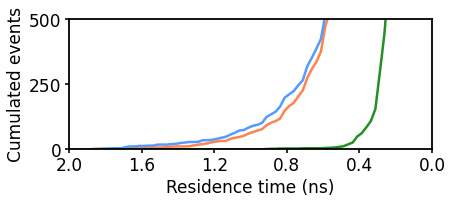

In [37]:
groups = [['SER', 'DOP', 'PHE'],
          ['SER', 'SEN'],
          ['DOP', 'DON'],
          ['PHC', 'PHN', 'PHE', 'PHA'],
          ['SER', 'SEN', 'DOP', 'DON', 'PHC', 'PHN', 'PHE', 'PHA']]

groups = [['SER', 'DOP', 'PHE']]
for group in groups:
    src.plot_cumevents(group, btimes=btimes, colors=colors_btime, ylim=(0,500), xlim=(2,0.), nticks=6, ignore_ns=0.1, savefig=True, prefix="Figures/WSTDrev")
    #src.plot_cumevents(group, btimes=btimes, colors=colors_btime, ylim=(0,1), xlim=(1,0), ignore_ns=0.06, normed=True)

In [40]:
reload(src)

<module 'Analysis_source' from 'C:\\Users\\sfranco\\Documents\\PhD\\Data\\WaterSTD\\Analysis_source.py'>

NameError: name 'svg2emf' is not defined

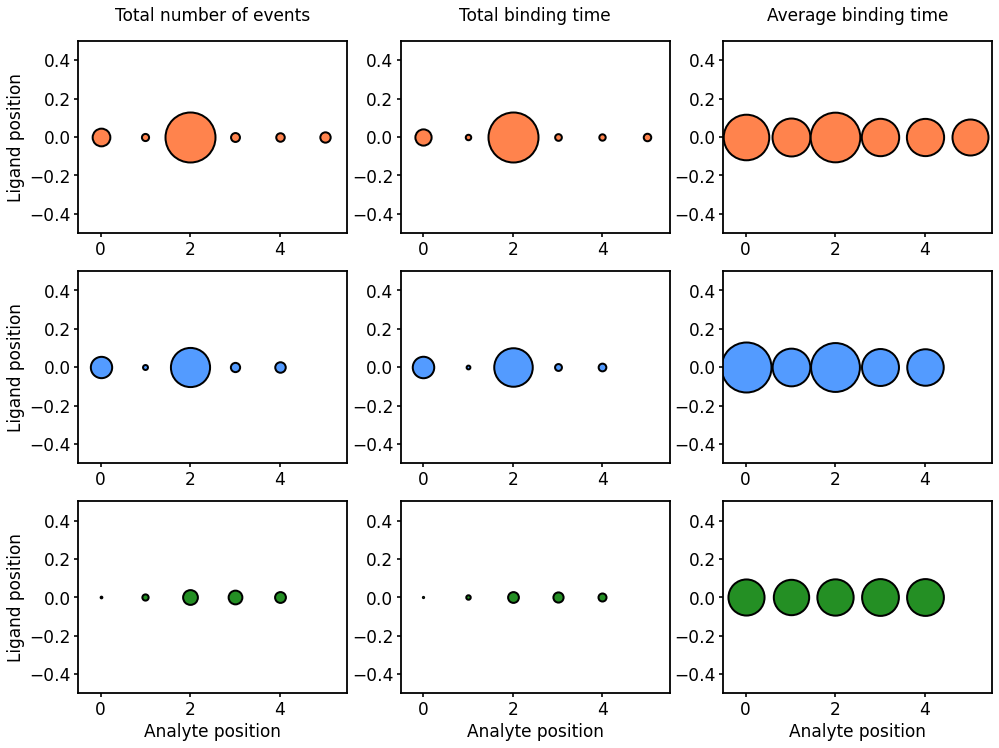

In [41]:
#src.plot_positions(['SER', 'SEN', 'DOP', 'DON', 'PHC', 'PHN', 'PHE', 'PHA'], btimes=btimes, colors=colors_btime, req_sample_size=100, ignore_ns=0.2)
src.plot_positions(['SER', 'DOP', 'PHE'], btimes=btimes, colors=colors_btime, req_sample_size=100, ignore_ns=0.1, savefig=True, prefix="Figures/WSTDrev")

In [ ]:
reload(src)

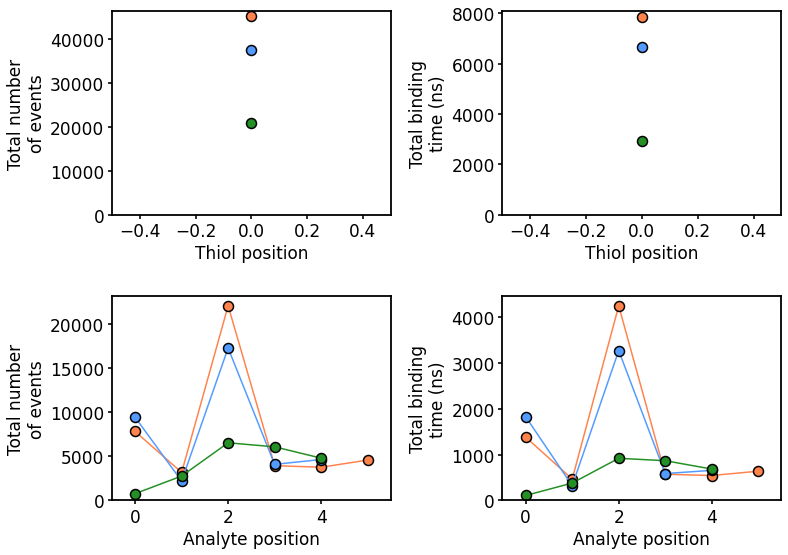

In [30]:
#src.plot_barpositions(['SER', 'SEN', 'DOP', 'DON', 'PHC', 'PHN', 'PHE', 'PHA'], btimes=btimes, colors=colors_btime, req_sample_size=100, ignore_ns=0.2)
src.plot_barpositions(['SER', 'DOP', 'PHE'], btimes=btimes, colors=colors_btime, req_sample_size=100, ignore_ns=0.1)